Классификация данных с помощью Случайного леса





  В течение прошедшего десятилетия огромную популярность в приложениях машинного обучения получили случайные леса (random forests), и причина тому - их 
хорошая классификационная способность, масштабируемость и простота использования. Интуитивно случайный лес можно рассматривать как ансамбль деревьев 
решений. В основе ансамблевого обучения лежит идея объединения слабых учеников для создания более устойчивой модели, т.е. сильного ученика, с более хорошей 
ошибкой обобщения и меньшей восприимчивостью к переобучению. Алгоритм случайного леса можно резюмировать в четырех простых шагах:  
1. Извлечь случайную бутстрап-выборку размера п (случайным образом отобрать из тренировочного набора данных п образцов с возвратом, то есть повторным способом).  
2. Вырастить дерево решений из бутстрап-выборки. В каждом узле:  
    1) случайным образом отобрать d признаков без возврата, т. е. бесповторным способом;  
    2) расщепить узел, используя признак, который обеспечивает наилучшее расщепление согласно целевой функции, например путем максимизации прироста информации;  
    3) повторить шаги 1 и 2 k число раз;  
    4) для назначения метки класса агрегировать прогноз из каждого дерева на основе большинства голосов.   

 Модель случайного леса № 1. Ирисы Фишера.

In [1]:
from sklearn import datasets
import numpy as np

# Загружаем данные
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # В качестве признаков возьмем длину и ширину лепистков
y = iris.target # Метки классов


In [2]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from distutils.version import LooseVersion

# Функция для визуализации границ решения 

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
        else:
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

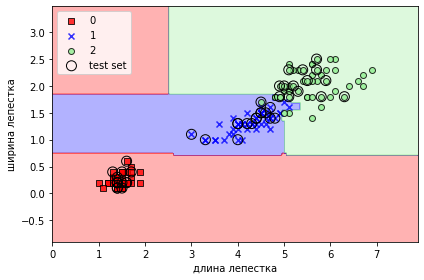

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() # Создаем модель
forest.fit(X_train, y_train) # Обучаем модель

# Соединим обучающий и тестовый наборы данных для визуализации
X_combined = np.vstack((X_train, X_test))  
y_combined = np.hstack((y_train, y_test))

# Визуализируем границы решения
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('длина лепестка')
plt.ylabel('ширина лепестка')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
# Оценим качество полученнной модели 
print('Доля правильных ответов на обучающей выборке: ', forest.score(X_train, y_train))
print('Доля правильных ответов на тестовой выборке: ', forest.score(X_test, y_test))

Доля правильных ответов на обучающей выборке:  0.9904761904761905
Доля правильных ответов на тестовой выборке:  0.9777777777777777


In [9]:
X_test

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3],
       [4.5, 1.7],
       [4.4, 1.4],
       [4. , 1.3],
       [5.8, 1.8],
       [4.5, 1.5],
       [5.3, 1.9],
       [1.3, 0.4],
       [1.5, 0.4],
       [4.9, 1.8],
       [1.4, 0.2],
       [3.3, 1. ],
       [1.4, 0.2],
       [4.8, 1.4],
       [5.1, 2.3],
       [4.5, 1.5],
       [4.3, 1.3],
       [5.2, 2. ],
       [5.9, 2.1],
       [1.4, 0.1],
       [4.4, 1.4],
       [4.9, 2. ],
       [4.2, 1.3],
       [4.7, 1.6],
       [3. , 1.1],
       [5.7, 2.5],
       [1.6, 0.6],
       [5. , 2. ],
       [1.6, 0.2],
       [1.4, 0.2],
       [4. , 1. ],
       [4. , 1.3],
       [6.3, 1.8],
       [5.5, 2.1],
       [1.4, 0.1],
       [1.6, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [5.7, 2.3],
       [5.1, 1.8],
       [4.6, 1.5],
       [1.5, 0.2],
       [1.5, 0.1]])

In [10]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

Модель случайного леса № 2. Спектральный класс звезды.

In [11]:
import pandas as pd # загружаем библиотеки
import numpy as np

df = pd.read_csv("6 class csv.csv") # Загружаем данные 
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [12]:
df.info() # выводим информацию по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [13]:
df['Spectral Class'].value_counts() # анализируем данные (выводим "Спектральные классы звезд")

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Спектральная классификация звёзд — классификация звёзд по особенностям их спектров. Спектры звёзд сильно различаются, хотя в большинстве своём являются непрерывными с линиями поглощения. Современная спектральная классификация является двупараметрической: вид спектра, зависящий в первую очередь от температуры, описывается спектральным классом, а светимость звезды описывается классом светимости. Также классификация может учитывать дополнительные особенности спектра.

Основные спектральные классы звёзд в порядке уменьшения температуры, от более голубых к более красным — O, B, A, F, G, K, M. Большинство звёзд, в том числе и Солнце, относится к этим спектральным классам.

Text(0.5, 1.0, 'Гистограмма количества звезд в спектральных классах')

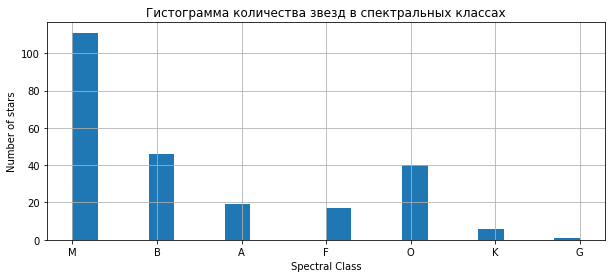

In [14]:
import matplotlib.pyplot as plt
import matplotlib
df['Spectral Class'].hist(figsize=(10,4), bins=20) # построение гистограммы
plt.xlabel('Spectral Class')
plt.ylabel('Number of stars')
plt.title("Гистограмма количества звезд в спектральных классах")

In [15]:
df['Star color'].value_counts() # анализируем данные (выводим "Цвет звезды")

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
white                   3
Yellowish White         3
Blue white              3
Orange                  2
Whitish                 2
yellowish               2
Blue                    1
Yellowish               1
Orange-Red              1
Blue-White              1
White-Yellow            1
Pale yellow orange      1
Blue white              1
Name: Star color, dtype: int64

In [16]:
X=df.drop('Spectral Class',axis=1) # В качестве признаков возьмем все данные по звездам (температура, светимость, радиус, абс. звездная велич., вид звезды и цвет)
y=df['Spectral Class'] # выходной параметр - "Спектральный класс"

In [17]:
X_transform=pd.get_dummies(X) # преобразуем категориальные данные ("Цвет звезды") в индикаторные переменные (0,1)
X_transform

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [18]:
df=pd.concat([X_transform,y],axis=1) # объединяем преобразованный X_transform ("Цвет звезды")  и y ("Спектральный класс")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,A
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,A


In [19]:
df_train = df # определяем тренировочный набор данных
df_test = df.drop('Spectral Class', axis = 1)  #определяем тестовый набор данных (все столбцы кроме "Спектрального класса")


In [ ]:
df_train

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,O
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,A
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,A


In [20]:
df_test

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [21]:
df_train['Spectral Class'].unique() # функция находит уникальные элементы массива и возвращ. в отсортир массив

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [22]:
df_train['Spectral Class']=df_train['Spectral Class'].astype('category') #присваиваем "Спектральному классу" категориальное значение

In [23]:
df_y=df_train['Spectral Class'].cat.codes # кодируем значения "Cпектрального класса"
df_y

0      5
1      5
2      5
3      5
4      5
      ..
235    6
236    6
237    0
238    0
239    6
Length: 240, dtype: int8

In [24]:
dict_SpCl={0:'A', # создаем словарь для закодированных значений "Спектрального класса"
              1:'B', 
              2:'F',
              3:'G',
              4:'K',
              5:'M',
              6:'O'}

In [25]:
X=df_train.drop('Spectral Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.3, random_state=42) # разбиваем на тестовую и тренировочную выборку
y_train.value_counts() 

5    76
1    31
6    27
0    16
2    14
4     3
3     1
dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier # импортируем  RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(n_estimators=50,
criterion='gini', max_depth=8, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None,
bootstrap=True, oob_score=False, n_jobs=1,
random_state=None, verbose=0, warm_start=False,
class_weight=None) # создаем модель
rfc.fit(X_train, y_train) # обучаем модель
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))# выводим отчет

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.94      1.00      0.97        15
           2       0.60      1.00      0.75         3
           4       0.00      0.00      0.00         3
           5       0.97      1.00      0.99        35
           6       1.00      1.00      1.00        13

    accuracy                           0.94        72
   macro avg       0.75      0.78      0.75        72
weighted avg       0.92      0.94      0.93        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
y_pred #  предсказанные значения для входных значений X_test

array([1, 5, 2, 6, 6, 5, 1, 1, 5, 1, 5, 1, 5, 6, 5, 1, 5, 5, 1, 5, 5, 5,
       6, 6, 6, 1, 5, 1, 0, 1, 2, 6, 2, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       1, 5, 6, 2, 5, 5, 1, 5, 1, 5, 6, 1, 5, 2, 5, 5, 0, 5, 5, 5, 6, 5,
       6, 1, 5, 5, 1, 5], dtype=int8)

In [30]:
y_test # выходные значения тестовой выборки

24     1
6      5
93     4
109    6
104    6
      ..
84     1
117    5
194    5
177    1
111    5
Length: 72, dtype: int8

In [31]:
y_pred_test=rfc.predict(df_test)
y_pred_test # все предсказанные значения

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 6, 1, 1, 1, 2, 0, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 4, 4, 2, 0, 0, 2, 2, 0, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 1, 5, 5,
       6, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 6, 6, 0, 1, 1, 2,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 1, 6, 6, 0, 0, 6],
      dtype=int8)

In [32]:
y_pred_itog=pd.DataFrame(y_pred_test) 
df_y_pred=y_pred_itog[0].map(dict_SpCl) # раскодируем значения "Спектрального класса"
df_y_pred

0      M
1      M
2      M
3      M
4      M
      ..
235    O
236    O
237    A
238    A
239    O
Name: 0, Length: 240, dtype: object

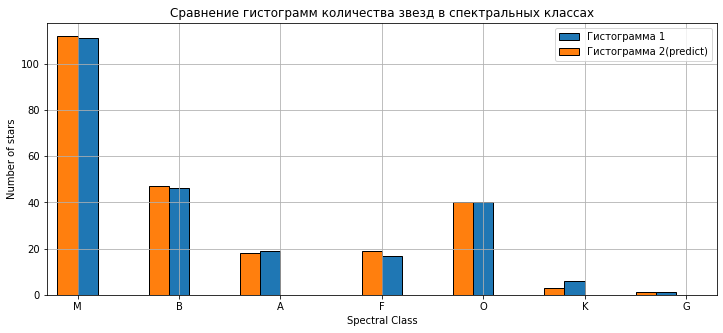

In [33]:
df['Spectral Class'].hist(figsize=(12,5), edgecolor="black", bins=20, label="Гистограмма 1", width=0.2) # построение гистограммы
plt.xlabel('Spectral Class')
plt.ylabel('Number of stars')
df_y_pred.hist(figsize=(12,5), edgecolor="black",bins=20, label="Гистограмма 2(predict)",width=-0.2) # построение гистограммы
plt.legend(loc=1)
plt.title("Сравнение гистограмм количества звезд в спектральных классах")
plt.show()

In [34]:
# Оценим качество полученнной модели 
print('Доля правильных ответов на обучающей выборке: ', rfc.score(X_train, y_train))
print('Доля правильных ответов на тестовой выборке: ', rfc.score(X_test, y_test))

Доля правильных ответов на обучающей выборке:  1.0
Доля правильных ответов на тестовой выборке:  0.9444444444444444
